# **Main implementation**

*Authors:*
- *Myroslava Sánchez Andrade A01730712*
- *Karen Rugerio Armenta A01733228*
- *José Antonio Bobadilla García A01734433*
- *Alejandro Castro Reus A01731065*

*Creation date: 01/10/2022*

*Last updated: 27/11/2022*

---

In [1]:
# Function that configures the storage
from fragments.functions.storage_configuration import configure_storage

# Function that transforms the dataset **for the modelling**
from fragments.functions.transform_model import transform_df_model

# Function that transforms the dataset **for the prediction**
from fragments.functions.transform_prediction import transform_df_predict

# Function that trains the model mlp
from fragments.functions.model_mlp import train_mlp

# Function that trains the model decision tree
from fragments.functions.model_decision_tree import train_decision_tree

# Function that trains the model decision tree
from fragments.functions.model_logistic_regression import train_logistic_regression

# Function that trains the model decision tree
from fragments.functions.model_random_forest import train_random_forest

In [2]:
# Importing the necessary libraries
import pandas as pd
from joblib import load, dump

*THESE VARIABLES MUST BE GIVEN BY THE USER, PLEASE EDIT TO USE*

In [3]:
# Defining the file to use
dataset_path = 'C:\\Users\\myros\\Documents\\7mo_Semestre_Period2\\Reto\\TC3007C_AI\\datasets_prueba\\RAW3.csv'
original_name_dataset = 'WA_Fn-UseC_-Telco-Customer-Churn'
target_column_name = 'Churn'

### ***Storage configuration***

In [4]:
configure_storage(dataset_path, original_name_dataset)

---

### ***Data preparation***

In [5]:
transform_df_model(original_name_dataset, target_column_name)

---
### ***Model training and Evaluation***

*THIS VARIABLE MUST BE GIVEN BY THE USER, PLEASE EDIT TO USE*

In [6]:
# Define if the model is using SMOTE algorithm
smote = False

#### *MLP*

Printing the K-fold Cross Validation


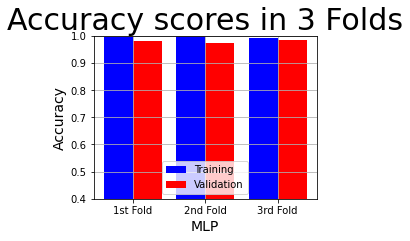

MSE Train: 0.009652509652509652
Accuracy Train: 0.9903474903474904
MSE Test: 0.1443609022556391
Accuracy Test: 0.8556390977443609


In [7]:
confussion_matrix, mlp_results = train_mlp(target_column_name, original_name_dataset, smote)

In [8]:
confussion_matrix

,0,1
0,567,4
1,92,2


#### *Decision Tree*

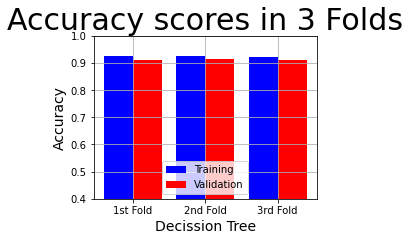

MSE Train: 0.0703273830522825
Accuracy Train: 0.9296726169477175
MSE Test: 0.09809980629093257
Accuracy Test: 0.9019001937090674


In [59]:
confussion_matrix, decision_tree_results = train_decision_tree(target_column_name, original_name_dataset, smote)

In [60]:
confussion_matrix

,0,1
0,9162,1311
1,816,10393


#### *Logistic Regression*

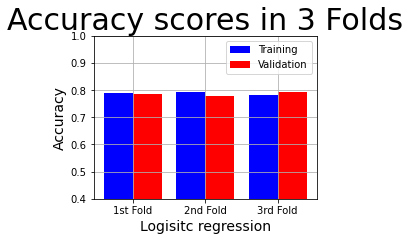

MSE Train: 0.2127357533968769
Accuracy Train: 0.7872642466031231
MSE Test: 0.21070075757575757
Accuracy Test: 0.7892992424242424


In [6]:
confussion_matrix, logistic_tree_results = train_logistic_regression(target_column_name, original_name_dataset, smote)

In [7]:
confussion_matrix

,0,1
0,1420,314
1,131,247


#### *Random Forest*

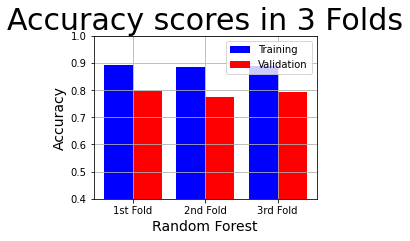

MSE Train: 0.1320219022510647
Accuracy Train: 0.8679780977489353
MSE Test: 0.20928030303030304
Accuracy Test: 0.790719696969697


In [5]:
confussion_matrix, random_forest_results = train_random_forest(target_column_name, original_name_dataset, smote)

In [6]:
confussion_matrix

,0,1
0,1412,303
1,139,258


---
### ***Making new predictions***

*THIS VARIABLES MUST BE GIVEN BY THE USER, PLEASE EDIT TO USE*

In [10]:
transform_df_predict(original_name_dataset)

In [11]:
# Loading the model|
model = load(f'./fragments/joblibs/{original_name_dataset}/model/mlp/mlp_model.joblib')
model

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(7, 5, 3), random_state=1,
              solver='lbfgs')

In [12]:
df_to_predict = pd.read_csv(f'../data/{original_name_dataset}/{original_name_dataset}_new_transformed.csv')

#Predicting y for X_val
y_pred_prob = model.predict_proba(df_to_predict)
y_pred = model.predict(df_to_predict)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
len(y_pred)

2219